# Skill Set - Simple Regression

## Developer: Anthony Patregnani
## Course: Exploration into AI Machine and Deep Learning
## Program Requirements:
### 1. Contrast similarities/differences among AI vs. Machine Learning vs. Deep Learning
### 2. Identify correlations
### 3. Use Seaborn (Data visualization library)
### 4. Graph Correlations
### 5. Use simple linear regression
### 6. Create linear model
### 7. Plot regression line
### 8. Make predictions - using simple linear regression model
### 9. Plot Residuals

# Import Packages

In [1]:
# 1. Use Import Packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV

In [2]:
# 2. Read Dataset
cars = pd.read_csv("cars.csv")

# Display Records

In [3]:
# 3. Display first 5 records
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Dataframe summary

In [4]:
# 4. Print DataFrame summary
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Display Correlations

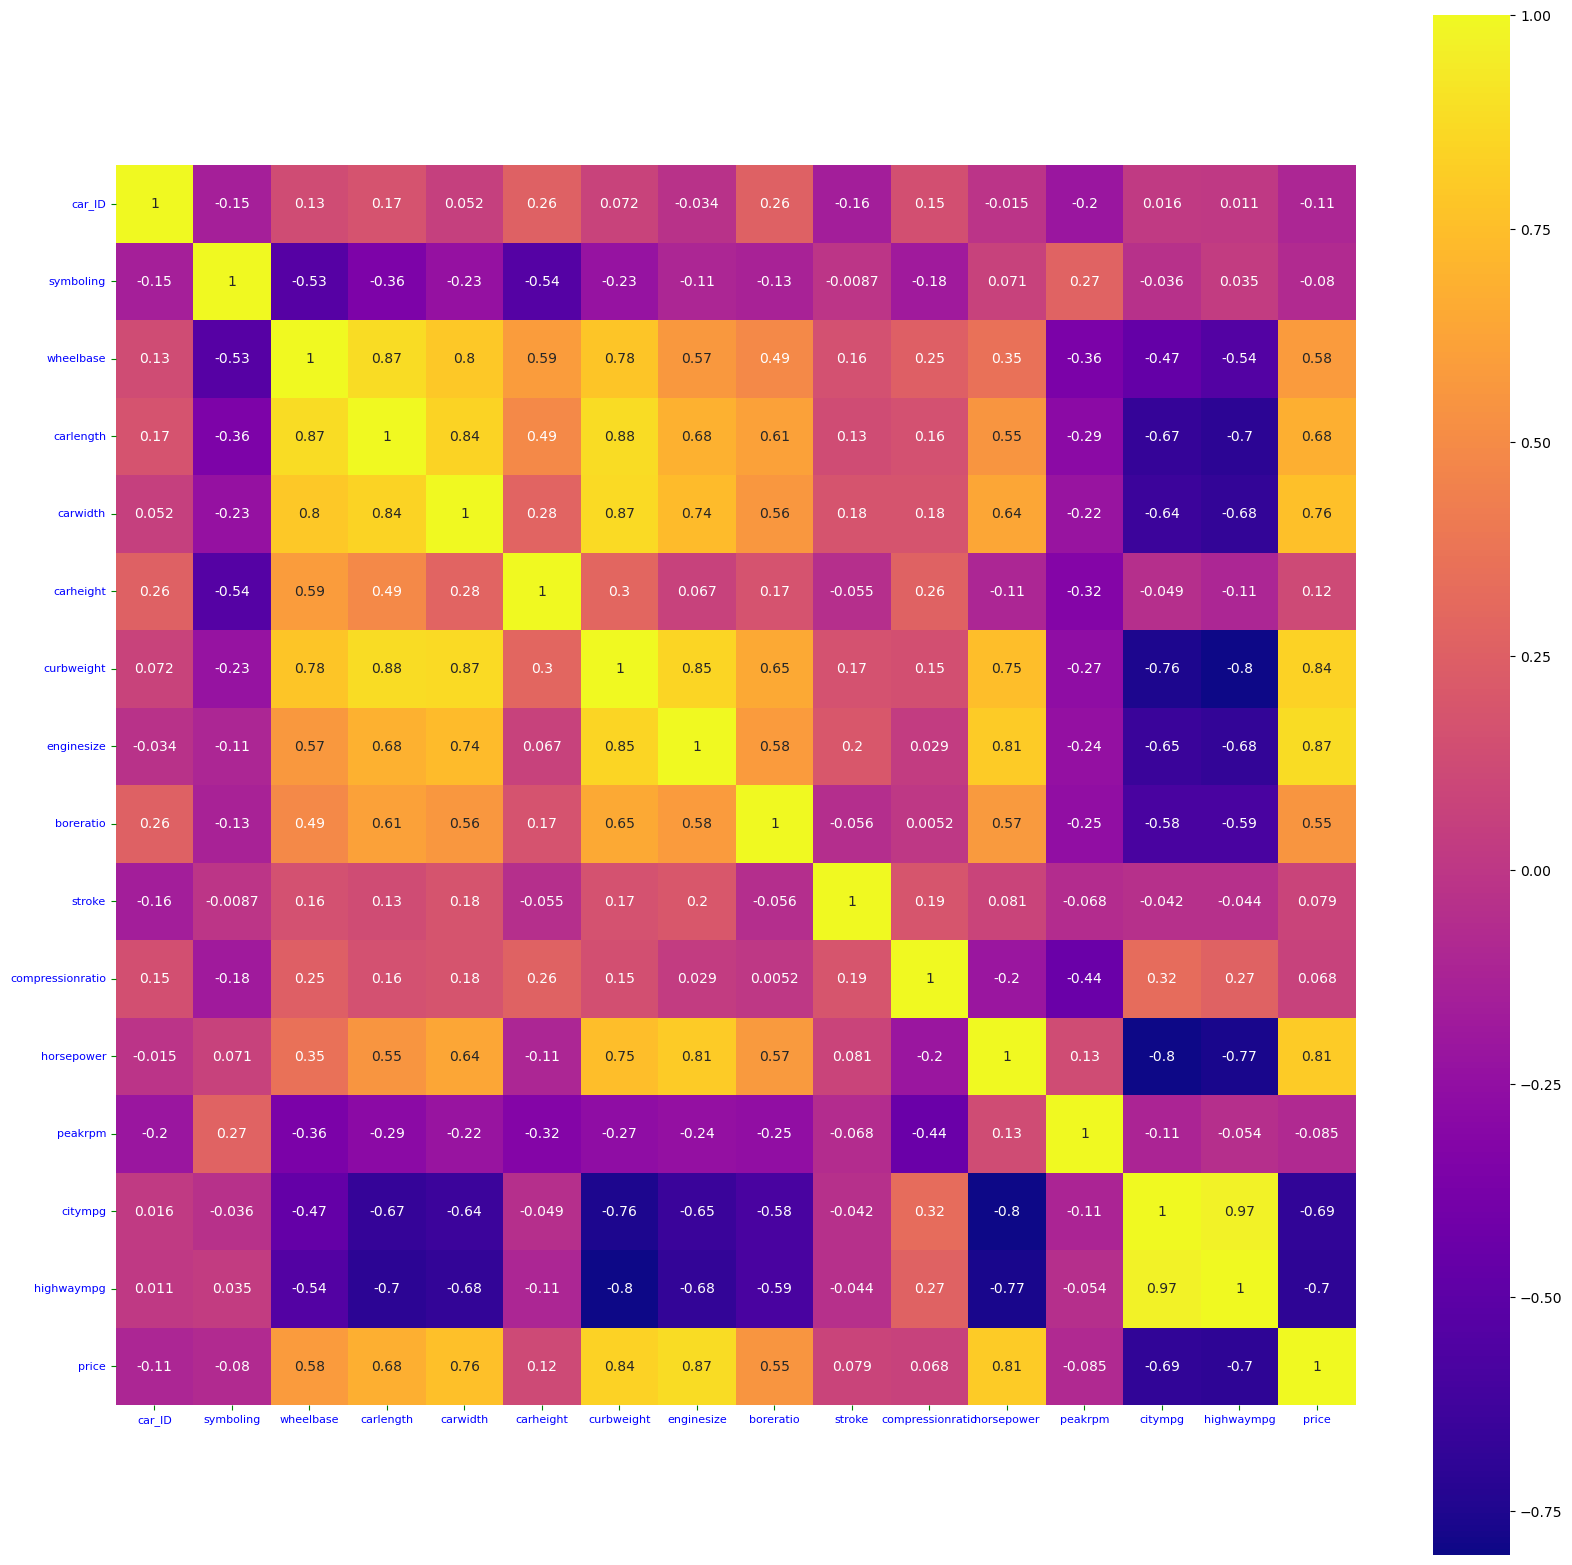

In [5]:
# 5. Visually display correlations using Seaborn's heatmap() function
cars.corr(numeric_only=True)[['car_ID']].sort_values(by="car_ID", ascending=False)

plt.figure(figsize = (20,20))
ax=sns.heatmap(data=cars.corr(numeric_only=True), annot=True, cmap='plasma', square=True)
ax.tick_params(axis='x', rotation=0, labelsize=8, labelcolor='blue', color='green')
ax.tick_params(axis='y', rotation=0, labelsize=8, labelcolor='blue', color='green')

# Visualize Correlations

<Axes: >

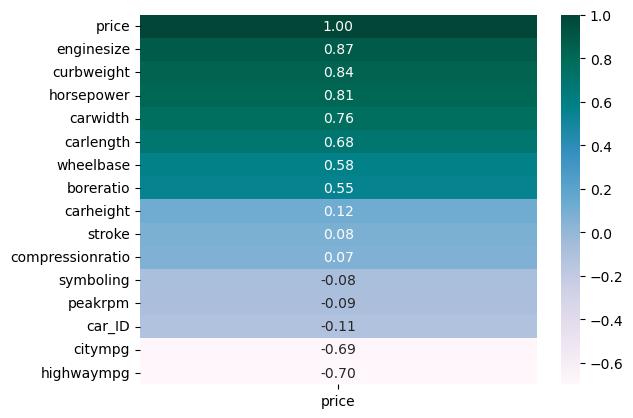

In [6]:
# 6. Visually condense correlations of one varible (DV) to other variables (IVs)

sns.heatmap(data=cars.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot=True, cmap="PuBuGn", fmt=f'.2f')

In [7]:
# Import Regression Model Packages

In [8]:
# 7. import packages for creating regression models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

In [9]:
# Split Datasets

In [10]:
# 8. Split training/test datasets (using DV and highest IVs)

x = cars[['enginesize']]
y = cars[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.80, test_size=0.20, random_state= 20)

In [11]:
# Fit Regression Model

In [12]:
# 9. Fit linear regression model
model = LinearRegression().fit(x_train, y_train)

In [13]:
# Score Variables

In [14]:
# 10. Score test variables
model.score(x_test, y_test)

0.7063964117029844

In [15]:
# 11. Score training variables
model.score(x_train, y_train)

0.766524123801206

In [16]:
# Predict Model

In [17]:
# 12. Predict Model (using x_test (IV) variable)
y_predicted = model.predict(x_test)

In [18]:
# 13. create "predicted" DataFrame including "predictedPrice" column
predicted = pd.DataFrame(y_predicted, columns = ['predictedPrice'])

In [19]:
# 14. combine test data and predicted data into DataFrame
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])

In [20]:
# Display Predicted Data

In [21]:
# 15. Display first 5 records of combined weight
final.head()

,predictedPrice,enginesize,price
0,14905.920686,136,15250.0
1,7164.387613,90,8916.5
2,7500.976007,92,8778.0
3,26181.631901,203,31400.5
4,7500.976007,92,6488.0


In [22]:
# 16. calculate residuals of price and predictedPrice (display first 7 records)
final['Residuals'] = final.price - final.predictedPrice

final.head(7)

,predictedPrice,enginesize,price,Residuals
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387
2,7500.976007,92,8778.0,1277.023993
3,26181.631901,203,31400.5,5218.868099
4,7500.976007,92,6488.0,-1012.976007
5,8342.446994,97,13845.0,5502.553006
6,7332.681810,91,6695.0,-637.681810


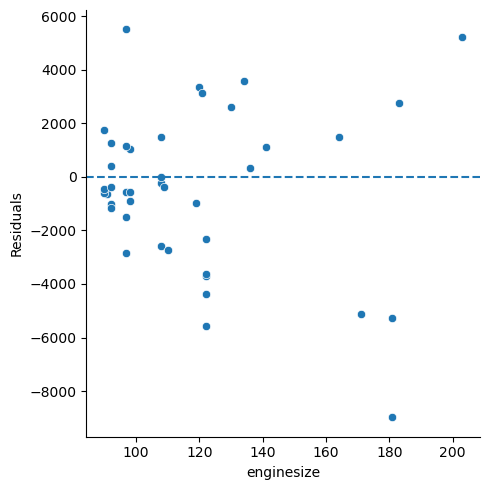

In [23]:
# 17. plot residuals using relplot()
rel = sns.relplot(data=final, x='enginesize', y='Residuals')
plt.axhline(1.25).set_linestyle("--")

<Axes: xlabel='Residuals', ylabel='Density'>

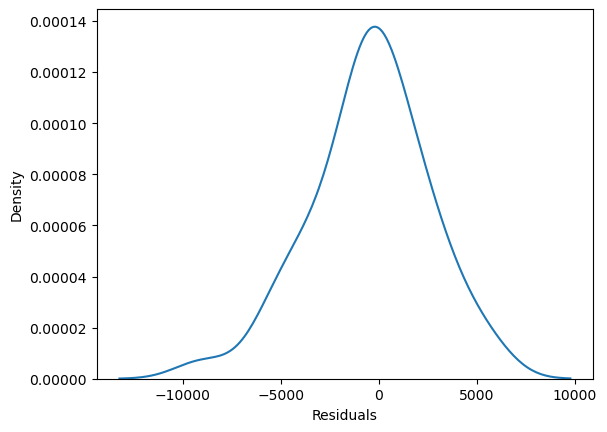

In [24]:
# 18. Plot residuals using kdeplot()
sns.kdeplot(data=final, x='Residuals')